## 예제로 보는 CNN 구조와 학습
- 모델 구현은 참고만


- [런타임] - [런타임 유형변경] - GPU 변경

### 일반적인 구조

#### modules import

In [14]:
%load_ext tensorboard

In [15]:
import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-white')

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, AvgPool2D, Dropout

from keras import datasets
from keras.utils import to_categorical, plot_model

#### 데이터 로드 및 전처리

In [16]:
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [17]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [18]:
x_train = x_train[:, :, :, np.newaxis]
x_test = x_test[:, :, :, np.newaxis]

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000,)
(10000,)


In [19]:
num_classes = 10

y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

In [20]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [21]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

#### CNN을 위한 간단한 모델

In [22]:
def build():
    model = Sequential([
        Conv2D(64, 7, activation='relu', padding='same', input_shape=(28, 28, 1)),
        MaxPool2D(pool_size=2),
        Conv2D(128, 3, activation='relu', padding='same'),
        MaxPool2D(pool_size=2),
        Conv2D(256, 3, activation='relu', padding='same'),
        MaxPool2D(pool_size=2),
        Flatten(),
        Dense(126, activation='relu'),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])

    return model

#### 모델 컴파일

In [23]:
model = build()

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 256)         295168    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 256)         0

In [24]:
plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [25]:
from keras.callbacks import TensorBoard

callbacks = [TensorBoard(log_dir='./logs')]

#### Hyper Parameters

In [26]:
epochs = 20
batch_size = 256
verbose = 1

#### 모델 학습
- `validation_split` 을 통해 검증 데이터셋을 생성


In [27]:
hist = model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=.3,
    callbacks=callbacks,
    verbose=verbose
)

2024-01-12 18:54:54.748226: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


Epoch 1/20


2024-01-12 18:54:57.092952: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f760cbc39f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-12 18:54:57.092988: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Ti, Compute Capability 8.6
2024-01-12 18:54:57.106734: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1705053297.208650    1139 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


165/165 [==============================] - 7s 20ms/step - loss: 1.1369 - accuracy: 0.5852 - val_loss: 0.5338 - val_accuracy: 0.8003
Epoch 2/20
165/165 [==============================] - 2s 15ms/step - loss: 0.6217 - accuracy: 0.7800 - val_loss: 0.4150 - val_accuracy: 0.8492
Epoch 3/20
165/165 [==============================] - 2s 15ms/step - loss: 0.5168 - accuracy: 0.8218 - val_loss: 0.3608 - val_accuracy: 0.8669
Epoch 4/20
165/165 [==============================] - 2s 15ms/step - loss: 0.4549 - accuracy: 0.8445 - val_loss: 0.3566 - val_accuracy: 0.8663
Epoch 5/20
165/165 [==============================] - 2s 15ms/step - loss: 0.4235 - accuracy: 0.8563 - val_loss: 0.3180 - val_accuracy: 0.8868
Epoch 6/20
165/165 [==============================] - 2s 15ms/step - loss: 0.3884 - accuracy: 0.8699 - val_loss: 0.2968 - val_accuracy: 0.8960
Epoch 7/20
165/165 [==============================] - 2s 14ms/step - loss: 0.3576 - accuracy: 0.8780 - val_loss: 0.2856 - val_accuracy: 0.9000
Epoch 8/20

In [28]:
log_dir = f'.logs{datetime.datetime.now().strftime("%Y%m%d-%H%M%S")}'

### LeNet-5

- 필기체 인식을 위한 모델

  <img src="https://hoya012.github.io/assets/img/image_classification_guidebook/1.PNG">

  <sub>https://www.researchgate.net/figure/The-LeNet-5-Architecture-a-convolutional-neural-network_fig4_321586653</sub>

- 코드 출처 : http://datahacker.rs/lenet-5-implementation-tensorflow-2-0/

#### module import

In [31]:
import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-white')

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, AvgPool2D, Dropout

from keras import datasets
from keras.utils import to_categorical, plot_model

from sklearn.model_selection import train_test_split

#### 데이터 로드 및 전처리

In [32]:
(x_train_full, y_train_full), (x_test, y_test) = datasets.mnist.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=.3, random_state=42)

x_train = x_train[..., np.newaxis]
x_val = x_val[..., np.newaxis]
x_test = x_test[..., np.newaxis]

num_classes = 10
y_train = to_categorical(y_train, num_classes=num_classes)
y_val = to_categorical(y_val, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255.
x_val /= 255.
x_test /= 255.

print(x_train.shape)
print(x_train.shape)
print(x_train.shape)
print(x_train.shape)
print(x_train.shape)
print(x_train.shape)

(42000, 28, 28, 1)
(42000, 28, 28, 1)
(42000, 28, 28, 1)
(42000, 28, 28, 1)
(42000, 28, 28, 1)
(42000, 28, 28, 1)


#### 모델 구성 및 컴파일

In [33]:
class LeNet(Sequential):
    def __init__(self, input_shape, nb_classes):
        super().__init__()

        self.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh'), input_shape=input_shape, padding='same')
        self.add(AvgPool2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
        self.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh'), padding='valid')
        self.add(AvgPool2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
        self.add(Flatten())
        self.add(Dense(120, activation='tanh'))
        self.add(Dense(84, activation='tanh'))
        self.add(Dense(nb_classes, activation='softmax'))

        self.compile(
            optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )

In [34]:
model = LeNet(input_shape=(28, 28, 1), nb_classes=10)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/root/miniconda3/envs/tf_gpu/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_1045/2690654441.py", line 1, in <module>
    model = LeNet(input_shape=(28, 28, 1), nb_classes=10)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/tmp/ipykernel_1045/894223789.py", line 5, in __init__
    self.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh'), input_shape=input_shape, padding='same')
  File "/root/miniconda3/envs/tf_gpu/lib/python3.11/site-packages/tensorflow/python/trackable/base.py", line 204, in _method_wrapper
    result = method(self, *args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/root/miniconda3/envs/tf_gpu/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/root/miniconda3/e

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 256)         295168    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 256)         0

In [38]:
plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


#### Hyper Parameters

In [39]:
epochs = 50
bath_size = 128
verbose = 1

#### 모델 학습

In [41]:
hist = model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_val, y_val),
    verbose=verbose
)

Epoch 1/50
165/165 [==============================] - 3s 16ms/step - loss: 1.8807 - accuracy: 0.3220 - val_loss: 1.2221 - val_accuracy: 0.6055
Epoch 2/50
165/165 [==============================] - 3s 16ms/step - loss: 1.5739 - accuracy: 0.3840 - val_loss: 0.9565 - val_accuracy: 0.7493
Epoch 3/50
165/165 [==============================] - 3s 16ms/step - loss: 1.3832 - accuracy: 0.4581 - val_loss: 0.7939 - val_accuracy: 0.7558
Epoch 4/50
165/165 [==============================] - 3s 15ms/step - loss: 1.3165 - accuracy: 0.4820 - val_loss: 0.7296 - val_accuracy: 0.7649
Epoch 5/50
165/165 [==============================] - 3s 15ms/step - loss: 1.2699 - accuracy: 0.5005 - val_loss: 0.6806 - val_accuracy: 0.7661
Epoch 6/50
165/165 [==============================] - 3s 15ms/step - loss: 1.1272 - accuracy: 0.5614 - val_loss: 0.6017 - val_accuracy: 0.7779
Epoch 7/50
165/165 [==============================] - 3s 15ms/step - loss: 1.0655 - accuracy: 0.5765 - val_loss: 0.5564 - val_accuracy: 0.7960

#### 학습 결과 시각화

In [42]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-white')

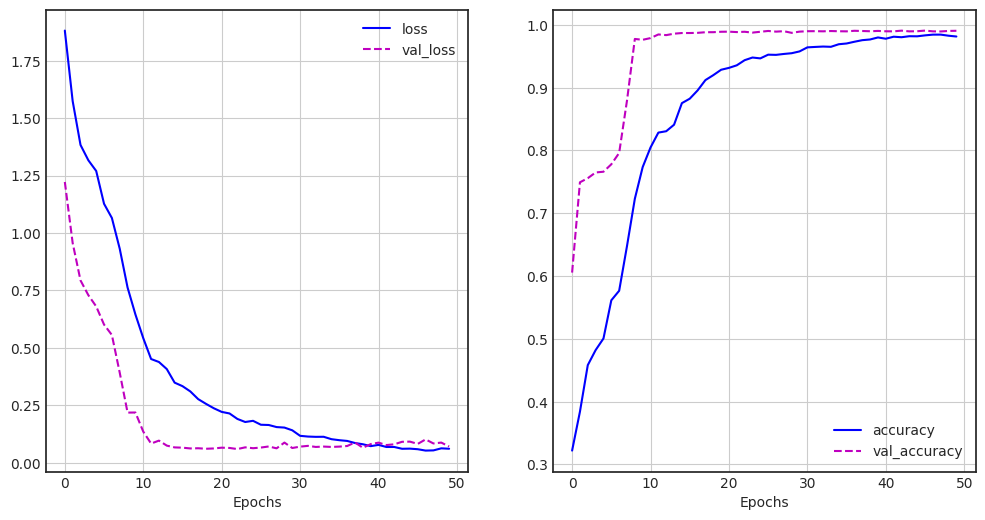

In [45]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], 'b-', label='loss')
plt.plot(hist.history['val_loss'], 'm--', label='val_loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist.history['accuracy'], 'b-', label='accuracy')
plt.plot(hist.history['val_accuracy'], 'm--', label='val_accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()

#### 모델 평가

In [46]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0553 - accuracy: 0.9920


[0.055341046303510666, 0.9919999837875366]